# COCO sample - animal or person?

In [28]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from skimage.io import imread
import pdb
import colorsys

## 1. 파일 및 이미지 확인

In [4]:
with open('./annotation2.json', 'r') as f:
    annot_data = json.load(f)
    
annot_df = pd.DataFrame(annot_data['annotations'])
annot_df.head()

id  image_id  category_id  \
0   1         1            1   
1   2         1            1   
2   3         2            2   
3   4         2            1   
4   5         2            1   

                                        segmentation     area  \
0  [[288.43, 63.86, 285.32, 64.07, 282.21, 65.1, ...  40558.0   
1  [[103.22, 91.87, 98.74, 93.36, 94.56, 95.45, 9...  19547.0   
2  [[454.7, 0.1, 453.6, 1.2, 453.2, 2.7, 452.4, 4...   6239.0   
3  [[113.09, 119.12, 109.98, 118.91, 106.24, 118....  24236.0   
4  [[544.07, 111.01, 540.84, 113.25, 537.85, 115....  22039.0   

                               bbox  iscrowd           attributes  
0   [212.74, 63.86, 165.89, 486.67]        0  {'occluded': False}  
1    [36.33, 90.68, 124.81, 477.45]        0  {'occluded': False}  
2          [445.1, 0.1, 77.6, 92.2]        0  {'occluded': False}  
3   [10.03, 114.15, 183.93, 224.35]        0  {'occluded': False}  
4  [436.48, 103.54, 190.16, 228.06]        0  {'occluded': False}

In [5]:
images_df = pd.DataFrame(annot_data['images'])
images_df.head()

id  width  height                       file_name  license flickr_url  \
0   1    425     640  COCO_test2014_000000000202.jpg        0              
1   2    640     427  COCO_test2014_000000000448.jpg        0              
2   3    640     425  COCO_test2014_000000000568.jpg        0              
3   4    640     424  COCO_test2014_000000000840.jpg        0              
4   5    640     427  COCO_test2014_000000000970.jpg        0              

  coco_url  date_captured  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

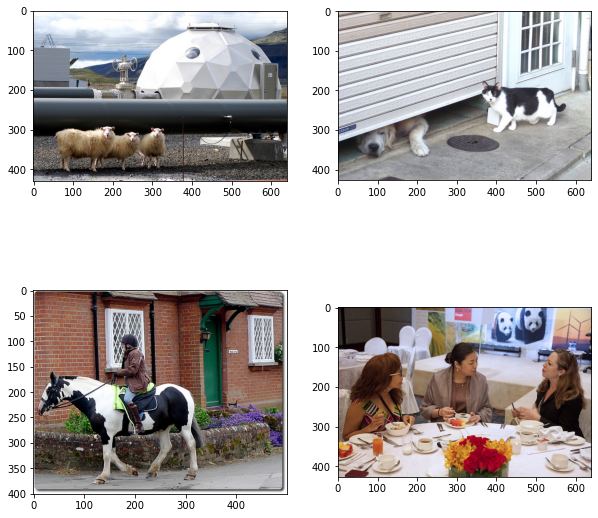

In [6]:
fig, f_ax = plt.subplots(2, 2, figsize=(10, 10))
for ax, (_, row) in zip(f_ax.flatten(), images_df.sample(4).iterrows()):
    img_data = imread(os.path.join('./data/', row['file_name']))
    ax.imshow(img_data)

In [7]:
df = pd.merge(annot_df, images_df, how='left', left_on='image_id', right_on='id')
df.head()

id_x  image_id  category_id  \
0     1         1            1   
1     2         1            1   
2     3         2            2   
3     4         2            1   
4     5         2            1   

                                        segmentation     area  \
0  [[288.43, 63.86, 285.32, 64.07, 282.21, 65.1, ...  40558.0   
1  [[103.22, 91.87, 98.74, 93.36, 94.56, 95.45, 9...  19547.0   
2  [[454.7, 0.1, 453.6, 1.2, 453.2, 2.7, 452.4, 4...   6239.0   
3  [[113.09, 119.12, 109.98, 118.91, 106.24, 118....  24236.0   
4  [[544.07, 111.01, 540.84, 113.25, 537.85, 115....  22039.0   

                               bbox  iscrowd           attributes  id_y  \
0   [212.74, 63.86, 165.89, 486.67]        0  {'occluded': False}     1   
1    [36.33, 90.68, 124.81, 477.45]        0  {'occluded': False}     1   
2          [445.1, 0.1, 77.6, 92.2]        0  {'occluded': False}     2   
3   [10.03, 114.15, 183.93, 224.35]        0  {'occluded': False}     2   
4  [436.48, 103.54, 190.16, 228.06]        0  {'occluded': False}     2   

   width  height                       file_name  license flickr_url coco_url  \
0    425     640  COCO_test2014_000000000202.jpg        0                       
1    425     640  COCO_test2014_000000000202.jpg        0                       
2    640     427  COCO_test2014_000000000448.jpg        0                       
3    640     427  COCO_test2014_000000000448.jpg        0                       
4    640     427  COCO_test2014_000000000448.jpg        0                       

   date_captured  
0              0  
1              0  
2              0  
3              0  
4              0

## 2. BBOX

In [12]:
def creat_doxes(in_rows):
    box_list = []
    left, top, width, high = in_rows['bbox']
    box_list += [Rectangle((left, top), width, high)]
        
    return box_list

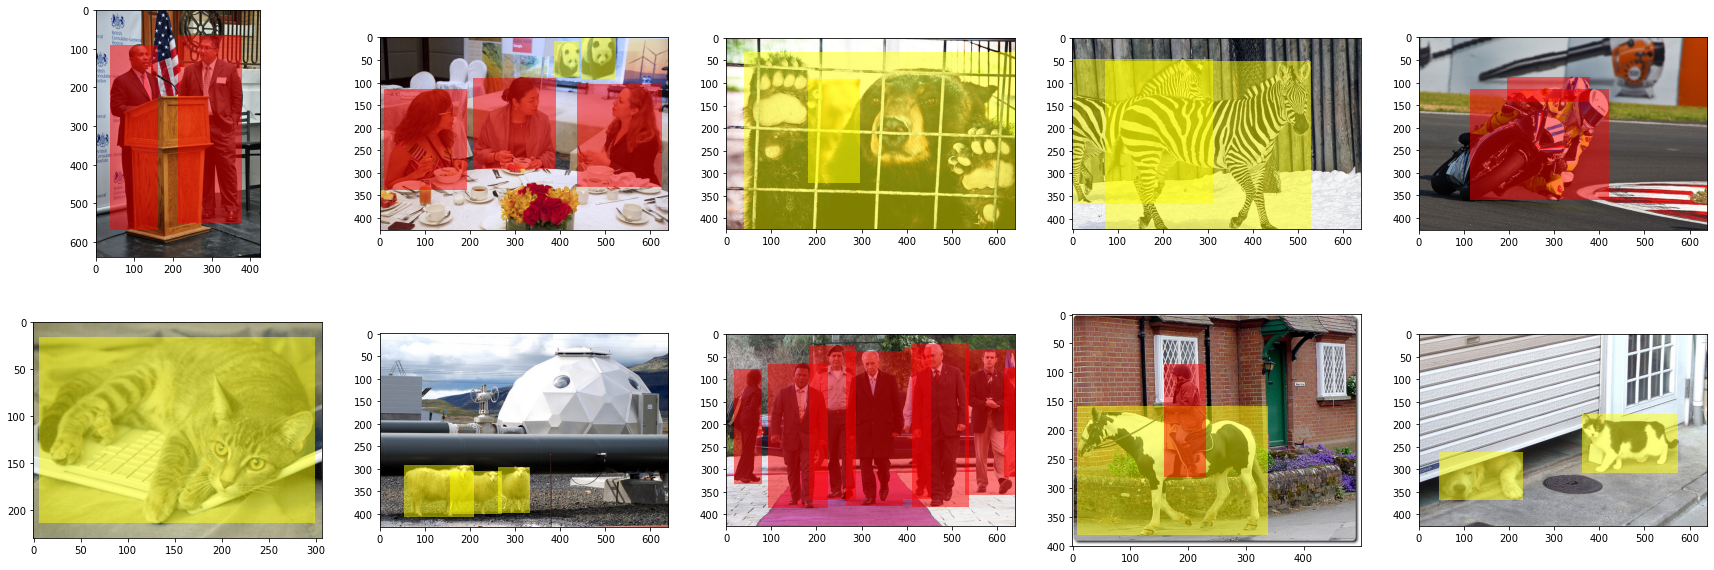

In [43]:
fig, m_axs = plt.subplots(2, 5, figsize=(30, 10))
color = {1:'red', 2:'yellow'}

for c_ax, (c_id, c_df) in zip(m_axs.flatten(), df.groupby('image_id')):
    img_data = imread(os.path.join('./data/', c_df['file_name'].values[0]))
    c_ax.imshow(img_data)
    
    for _, c_row in c_df.iterrows():
        box_list = creat_doxes(c_row)
        c_ax.add_collection(PatchCollection(box_list, alpha = 0.5, facecolors=color[c_row['category_id']])) #alpha 투명도

## 3. Polygons

In [17]:
from matplotlib.path import Path
from skimage.color import label2rgb

In [18]:
def rows_to_segmentation(in_img, in_df):
    xx, yy = np.meshgrid(range(in_img.shape[0]),
                         range(in_img.shape[1]),
                         indexing='ij')
    out_img = np.zeros(in_img.shape[:2])
    
    for _, c_row in in_df.iterrows():
        xy_vec = np.array(c_row['segmentation']).reshape((-1,2))
        c_ax.plot(xy_vec[:, 0], xy_vec[:, 1], label = c_df['id_x'])
        xy_path = Path(xy_vec)
        out_img += xy_path.contains_points(np.stack([yy.ravel(), xx.ravel()], -1)).reshape(out_img.shape)
        
    return out_img

AttributeError: 'list' object has no attribute 'get_transform'

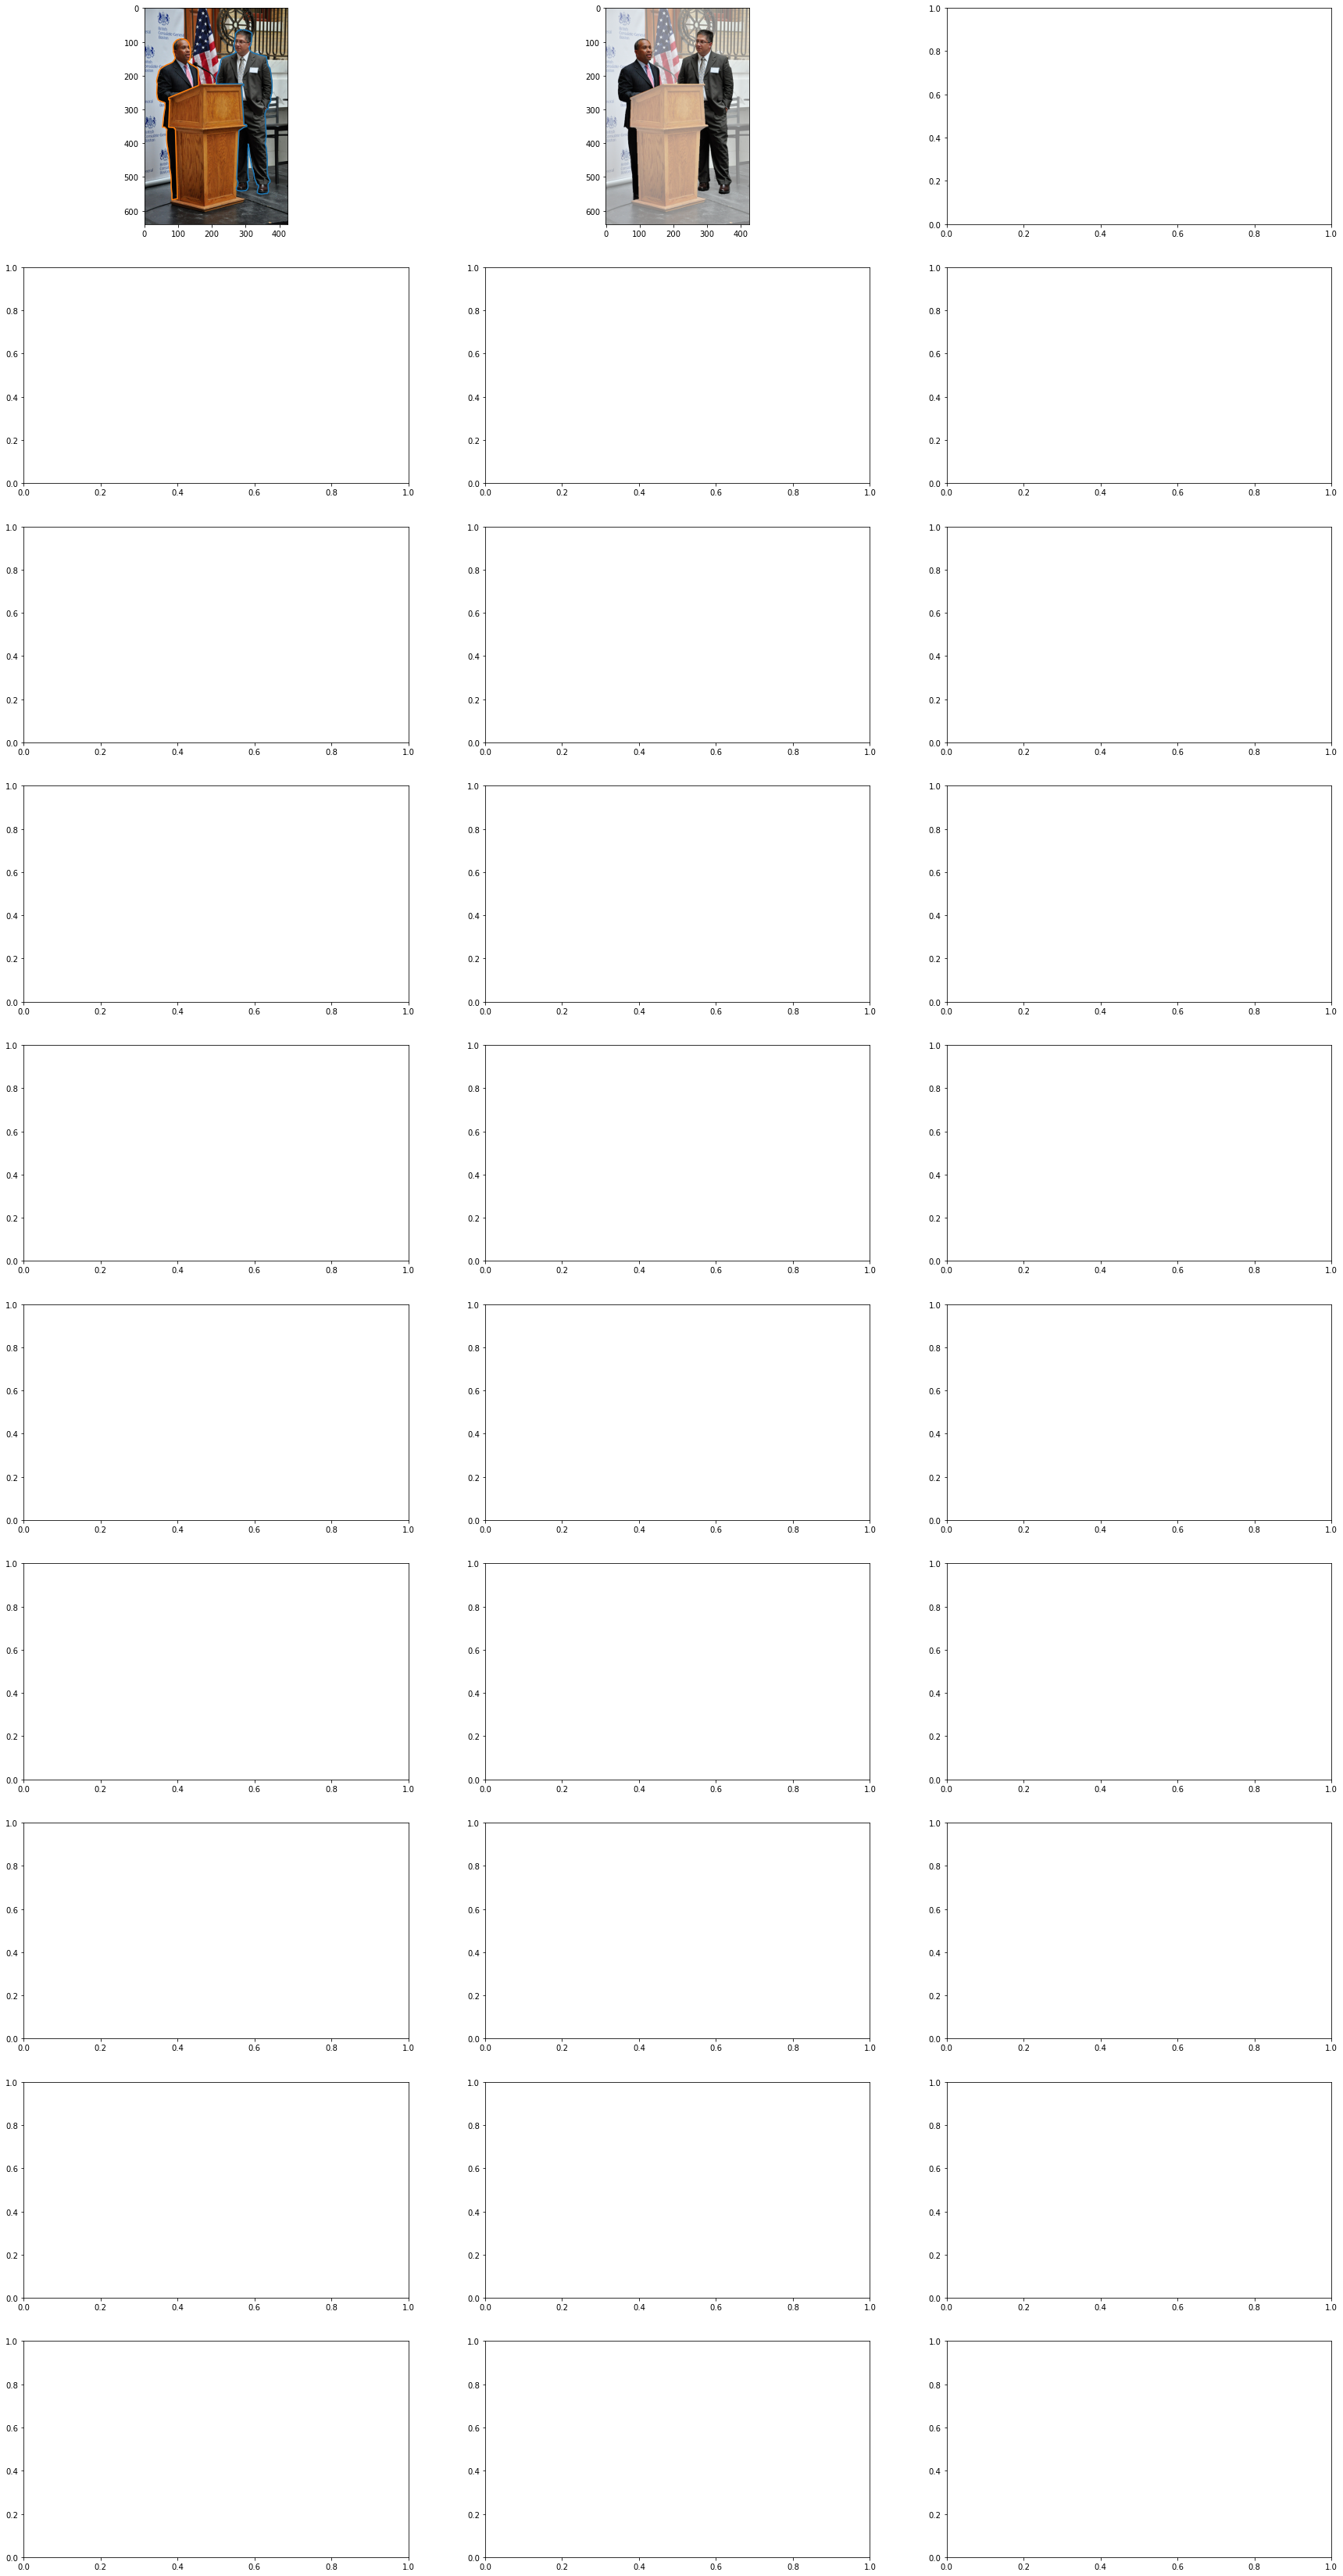

In [33]:
fig, m_axs = plt.subplots(10, 3, figsize=(30, 60))
color = {1:'red', 2:'yellow'}

for (c_ax, d_ax, f_ax), (c_id, c_df) in zip(m_axs, df.groupby('image_id')):
    img_data = imread(os.path.join('./data', c_df['file_name'].values[0]))
    c_ax.imshow(img_data) # 첫번째 테두리만
    
    out_img = rows_to_segmentation(img_data, c_df)
    rgba_img = np.concatenate([img_data, np.clip(np.expand_dims(127*out_img+127, -1), 0, 255).astype(np.uint8)], -1)
    d_ax.imshow(rgba_img) # 두번째 배경 흐리게
    
    for _, c_row in c_df.iterrows():
        f_ax.add_collection(PatchCollection(c_row['segmentation'], alpha = 0.5, facecolors=color[c_row['category_id']])) #alpha 투명도

(427, 640)

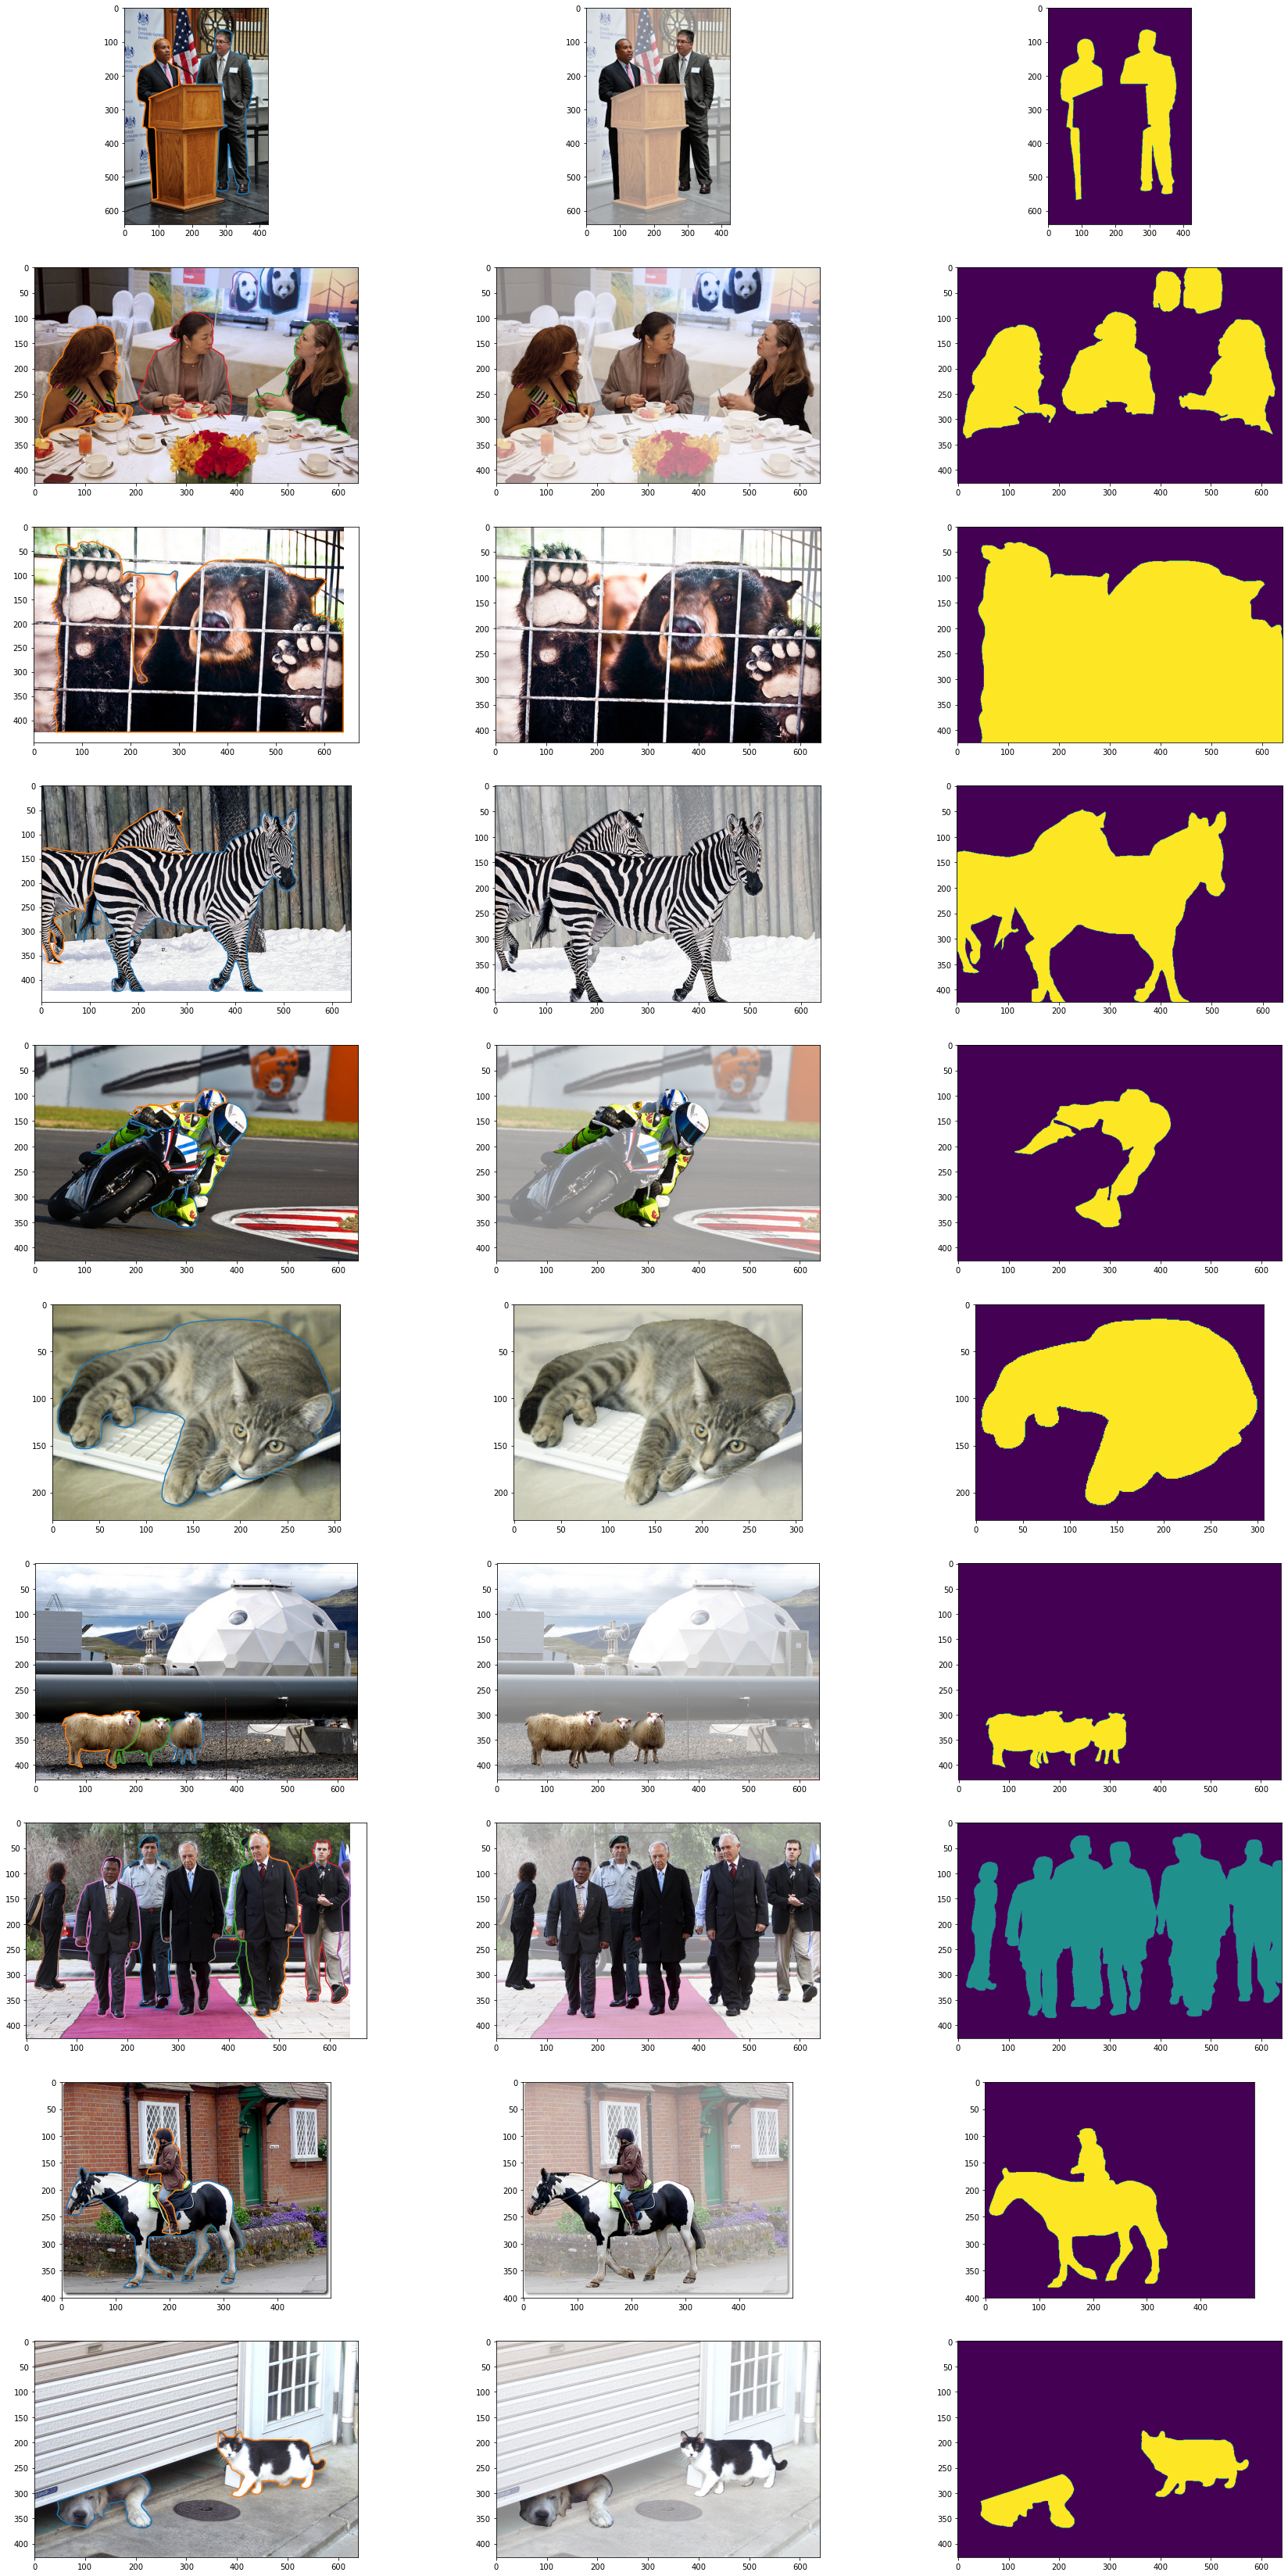

In [21]:
fig, m_axs = plt.subplots(10, 3, figsize=(30, 60))

for (c_ax, d_ax, f_ax), (c_id, c_df) in zip(m_axs, df.groupby('image_id')):
    img_data = imread(os.path.join('./data', c_df['file_name'].values[0]))
    c_ax.imshow(img_data) # 첫번째 테두리만
    
    out_img = rows_to_segmentation(img_data, c_df)
    rgba_img = np.concatenate([img_data, np.clip(np.expand_dims(127*out_img+127, -1), 0, 255).astype(np.uint8)], -1)
    d_ax.imshow(rgba_img) # 두번째 배경 흐리게
    f_ax.imshow(out_img) # 세번째 color
    

In [22]:
df['file_name'].values[0]

'COCO_test2014_000000000202.jpg'

In [11]:
df

id_x  image_id  category_id  \
0      1         1            1   
1      2         1            1   
2      3         2            2   
3      4         2            1   
4      5         2            1   
5      6         2            1   
6      7         2            2   
7      8         3            2   
8      9         3            2   
9     10         4            2   
10    11         4            2   
11    12         5            1   
12    13         5            1   
13    14         6            2   
14    15         7            2   
15    16         7            2   
16    17         7            2   
17    18         8            1   
18    19         8            1   
19    20         8            1   
20    21         8            1   
21    22         8            1   
22    23         8            1   
23    24         8            1   
24    25         8            1   
25    26         9            2   
26    27         9            1   
27    28        10            2   
28    29        10            2   

                                         segmentation      area  \
0   [[288.43, 63.86, 285.32, 64.07, 282.21, 65.1, ...   40558.0   
1   [[103.22, 91.87, 98.74, 93.36, 94.56, 95.45, 9...   19547.0   
2   [[454.7, 0.1, 453.6, 1.2, 453.2, 2.7, 452.4, 4...    6239.0   
3   [[113.09, 119.12, 109.98, 118.91, 106.24, 118....   24236.0   
4   [[544.07, 111.01, 540.84, 113.25, 537.85, 115....   22039.0   
5   [[315.02, 89.03, 312.72, 88.74, 310.56, 88.88,...   24571.0   
6   [[405.26, 8.31, 403.66, 8.51, 402.16, 8.91, 40...    3556.0   
7   [[182.08, 101.77, 181.33, 114.45, 186.55, 111....   11583.0   
8   [[407.62, 69.34, 402.03, 68.97, 395.32, 68.97,...  187897.0   
9   [[482.29, 62.76, 477.46, 65.73, 472.25, 63.5, ...   77043.0   
10  [[89.16, 258.39, 89.91, 253.93, 89.91, 248.72,...   26405.0   
11  [[380.0, 113.7, 378.53, 113.71, 376.12, 113.71...   23124.0   
12  [[380.0, 113.7, 378.53, 113.71, 376.12, 113.71...    3667.0   
13  [[67.21, 49.05, 64.18, 49.66, 61.16, 50.67, 58...   34629.0   
14  [[307.75, 297.38, 305.16, 297.73, 302.74, 296....    4624.0   
15  [[194.67, 293.05, 192.14, 292.62, 189.89, 292....   11003.0   
16  [[209.03, 315.71, 209.03, 318.24, 208.75, 321....    4652.0   
17  [[182.58, 115.16, 187.07, 118.9, 192.69, 121.9...   18514.0   
18  [[450.35, 22.49, 444.74, 24.33, 441.74, 29.2, ...   29621.0   
19  [[441.74, 29.2, 439.87, 34.82, 439.12, 40.47, ...    5198.0   
20  [[581.49, 34.63, 575.87, 35.75, 571.9, 39.1, 5...   21705.0   
21  [[621.7, 88.4, 624.7, 92.8, 626.6, 99.4, 628.9...    3344.0   
22  [[61.33, 78.62, 57.57, 79.63, 54.06, 81.38, 50...    9729.0   
23  [[171.34, 67.59, 165.72, 68.34, 160.11, 69.46,...   24873.0   
24  [[319.67, 38.0, 314.05, 39.12, 308.43, 41.0, 3...   27408.0   
25  [[183.53, 184.94, 185.76, 187.17, 187.38, 189....   30779.0   
26  [[188.19, 86.62, 185.15, 86.83, 181.9, 87.64, ...    6430.0   
27  [[45.7, 343.88, 47.15, 345.47, 48.74, 347.06, ...   11149.0   
28  [[391.95, 189.63, 389.83, 189.49, 387.71, 189....   15786.0   

                                bbox  iscrowd           attributes  id_y  \
0    [212.74, 63.86, 165.89, 486.67]        0  {'occluded': False}     1   
1     [36.33, 90.68, 124.81, 477.45]        0  {'occluded': False}     1   
2           [445.1, 0.1, 77.6, 92.2]        0  {'occluded': False}     2   
3    [10.03, 114.15, 183.93, 224.35]        0  {'occluded': False}     2   
4   [436.48, 103.54, 190.16, 228.06]        0  {'occluded': False}     2   
5    [205.64, 88.74, 183.95, 203.13]        0  {'occluded': False}     2   
6         [385.66, 8.11, 55.0, 80.0]        0  {'occluded': False}     2   
7    [181.33, 91.45, 115.91, 230.28]        0  {'occluded': False}     3   
8     [40.41, 30.94, 599.47, 393.69]        0  {'occluded': False}     3   
9      [72.8, 50.11, 454.87, 373.89]        0  {'occluded': False}     4   
10      [0.0, 46.75, 311.58, 320.38]        0  {'occluded': False}     4   
11    [112.24, 113.7, 308.26, 